In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Extract the values for scaling and reshaping
data_values = data['Passengers'].values.astype(float).reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# 21BCE2067 Kshitiz Bhargava

Epoch 1/50
4/4 [==============================] - 1s 45ms/step - loss: 0.2109 - val_loss: 0.1480
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.1162 - val_loss: 0.0766
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.2409
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0434 - val_loss: 0.0583
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0122 - val_loss: 0.0248
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.0219
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0420
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0446
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0232
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0187
Epoch 11/50
4/4 [=====================

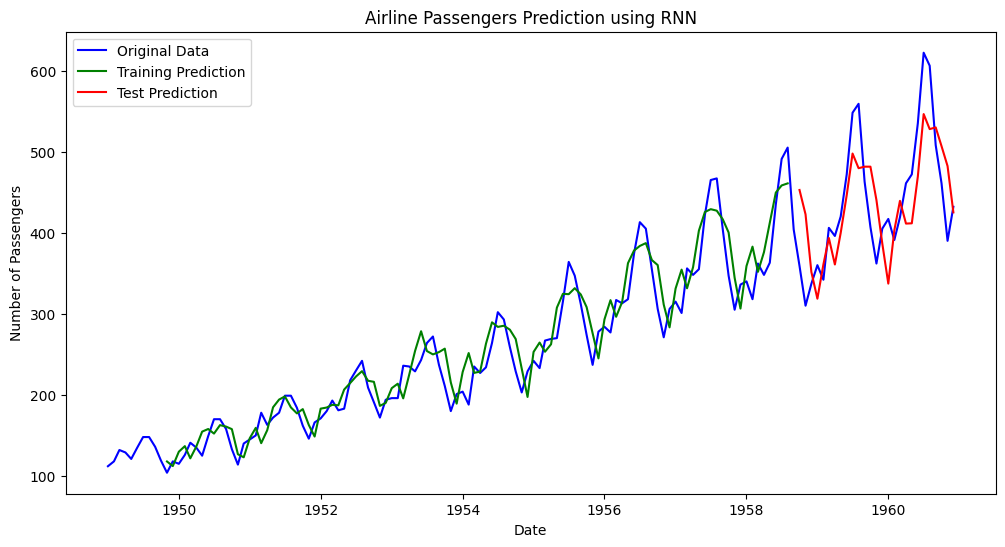

In [2]:
# Prepare the dataset for the RNN
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Set the time_step for training sequences
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for RNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Predict using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create date ranges for predictions
train_dates = data.index[time_step:time_step + len(train_predict)]
test_dates = data.index[time_step + len(train_predict) + 1:
                        time_step + len(train_predict) + 1 + len(test_predict)]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], label='Original Data', color='blue')
plt.plot(train_dates, train_predict, label='Training Prediction', color='green')
plt.plot(test_dates, test_predict, label='Test Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Airline Passengers Prediction using RNN')
plt.legend()
plt.show()

# 21BCE2067 Kshitiz Bhargava